# MLOps. Практическое задание №5

In [18]:
# Импорт необходимых библиотек
# Работа с массивами и генерация данных
import numpy as np
# Лингейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Отрисовка графиков
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
# Создание качественных датасетов для обучения модели линейной регрессии

# Зафиксируем повторяемый результат
np.random.seed(42)

# Датасет 1
X1 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y1 = (1 * X1 + var).reshape(-1, 1)

# Датасет 2
X2 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y2 = 1 * X2 + var

# Датасет 3
X3 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y3 = 1 * X3 + var

print(f"X:{X1}")
print(f"Y:{Y1}")

X:[  0.           2.04081633   4.08163265   6.12244898   8.16326531
  10.20408163  12.24489796  14.28571429  16.32653061  18.36734694
  20.40816327  22.44897959  24.48979592  26.53061224  28.57142857
  30.6122449   32.65306122  34.69387755  36.73469388  38.7755102
  40.81632653  42.85714286  44.89795918  46.93877551  48.97959184
  51.02040816  53.06122449  55.10204082  57.14285714  59.18367347
  61.2244898   63.26530612  65.30612245  67.34693878  69.3877551
  71.42857143  73.46938776  75.51020408  77.55102041  79.59183673
  81.63265306  83.67346939  85.71428571  87.75510204  89.79591837
  91.83673469  93.87755102  95.91836735  97.95918367 100.        ]
Y:[[  3.74540119]
 [ 11.54795939]
 [ 11.40157207]
 [ 12.10903382]
 [  9.72345171]
 [ 11.76402684]
 [ 12.82573408]
 [ 22.94747574]
 [ 22.33768073]
 [ 25.44807272]
 [ 20.61400821]
 [ 32.14807811]
 [ 32.81422233]
 [ 28.65400335]
 [ 30.38967824]
 [ 32.44629   ]
 [ 35.69548365]
 [ 39.94144187]
 [ 41.05414406]
 [ 41.68780161]
 [ 46.93485548]
 

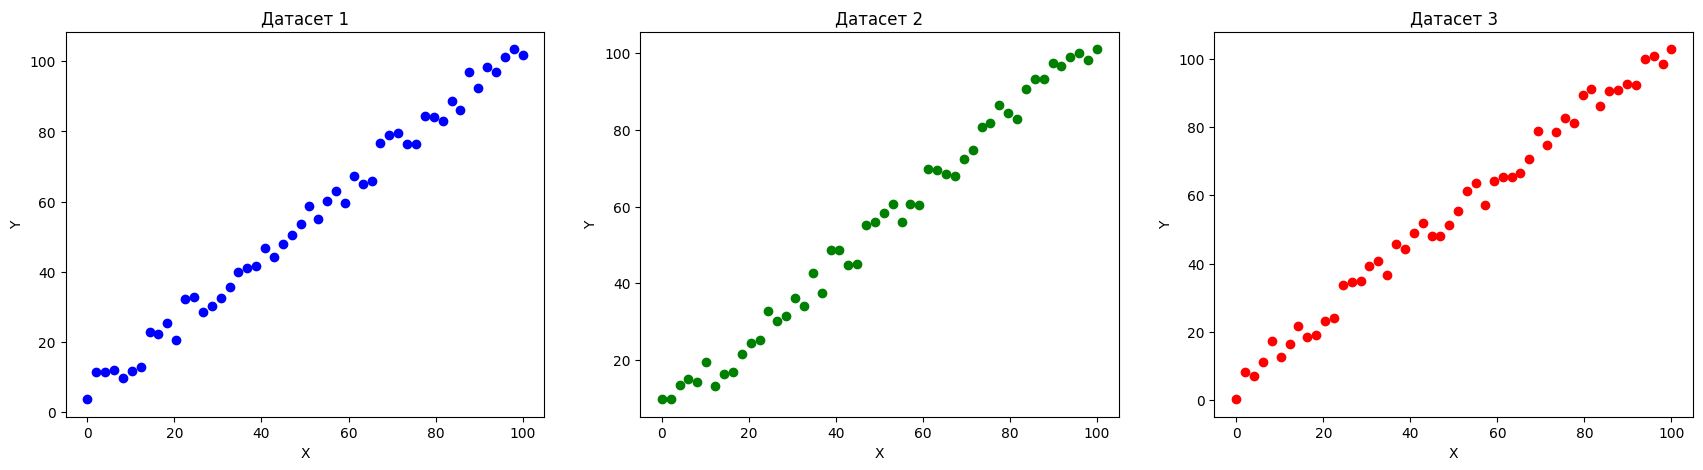

In [3]:
# Визуализация отношения между входным признаком Х и целевой переменной Y

# Создаем фигуру и две координатные плоскости
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 5))  # Устанавливаем размер фигуры 21x5

# Отображаем данные на первой координатной плоскости
ax1.scatter(X1, Y1, color='b')  # Красный цвет
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Датасет 1')

# Отображаем данные на второй координатной плоскости
ax2.scatter(X2, Y2, color='g')  # Синий цвет
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Датасет 2')

# Отображаем данные на второй координатной плоскости
ax3.scatter(X3, Y3, color='r')  # Зеленый цвет
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_title('Датасет 3')

# Показываем графики
plt.show()

In [11]:
# Перед обучением модели данные необходимо привести из одномерного массива к двумерному
X1, X2, X3 = X1.reshape(-1, 1), X2.reshape(-1, 1), X3.reshape(-1, 1)
Y1, Y2, Y3 = Y1.reshape(-1, 1), Y2.reshape(-1, 1), Y3.reshape(-1, 1)

In [12]:
# Обучение модели линейной регрессии на наборе данных 1
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

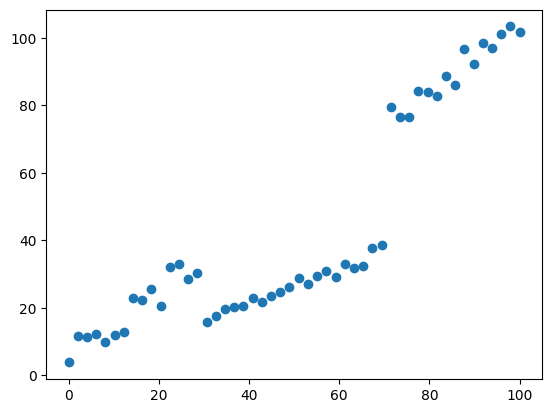

In [13]:
# "Испортим" шумом набор 1
Y1[15:35] *= 0.7
plt.scatter(X1, Y1)

In [14]:
# Тестирование модели на нормальных данных
Y2_predict = model.predict(X2)
Y3_predict = model.predict(X3)
# Тестирование модели на испорченных данных
Y1_predict = model.predict(X1)

In [36]:
# Посчитаем метрику r2 (коэффициент детерминации)
ds2_r2 = r2_score(Y2, Y2_predict)
ds3_r2 = r2_score(Y3, Y3_predict)
corr_ds1_r2 = r2_score(Y1, Y1_predict)
print(f"r2 (коэф. детерминации) на качественном наборе данных {ds2_r2}")
print(f"r2 (коэф. детерминации) на качественном наборе данных {ds3_r2}")
print(f"r2 (коэф. детерминации) на испорченном наборе данных {corr_ds1_r2}")

r2 (коэф. детерминации) на качественном наборе данных 0.9429245139232671
r2 (коэф. детерминации) на качественном наборе данных 0.9459989368698641
r2 (коэф. детерминации) на испорченном наборе данных 0.7670177784887573


# Сохранение программного кода в файл app.py

In [38]:
%%writefile sample_data/app.py
# Импорт необходимых библитотек
# Работа с массивами и генерация данных
import numpy as np
# Лингейная регрессия
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
# Отрисовка графиков
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Создание качественных датасетов для обучения модели линейной регрессии

# Зафиксируем повторяемый результат
np.random.seed(42)

# Датасет 1
X1 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y1 = (1 * X1 + var).reshape(-1, 1)

# Датасет 2
X2 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y2 = 1 * X2 + var

# Датасет 3
X3 = np.linspace(0,100,50)
var = np.random.uniform(0, 10, 50)
Y3 = 1 * X3 + var

# Перед обучением модели данные необходимо привести из одномерного массива к двумерному
X1, X2, X3 = X1.reshape(-1, 1), X2.reshape(-1, 1), X3.reshape(-1, 1)
Y1, Y2, Y3 = Y1.reshape(-1, 1), Y2.reshape(-1, 1), Y3.reshape(-1, 1)

# Обучение модели линейной регрессии на наборе данных 1
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# "Испортим" шумом набор 1
Y1[15:35] *= 0.7

# Тестирование модели на нормальных данных
Y2_predict = model.predict(X2)
Y3_predict = model.predict(X3)
# Тестирование модели на испорченных данных
Y1_predict = model.predict(X1)

# Анализ с помощью Pytest
def test_predictions_corr_ds1():
   assert r2_score(Y1, Y1_predict) > 0.9, "Модель имеет проблемы с набором данных 1"

def test_predictions_ds2():
    assert r2_score(Y2, Y2_predict) > 0.9, "Модель имеет проблемы с набором данных 2"

def test_predictions_ds3():
    assert r2_score(Y3, Y3_predict) > 0.9, "Модель имеет проблемы с набором данных 3"

Overwriting sample_data/app.py


# Тестирование модели

In [39]:
!pytest -v sample_data/app.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 3 items                                                                                  

sample_data/app.py::test_predictions_corr_ds1 FAILED                                         [ 33%]
sample_data/app.py::test_predictions_ds2 PASSED                                              [ 66%]
sample_data/app.py::test_predictions_ds3 PASSED                                              [100%]

============================================= FAILURES =============================================
____________________________________ test_predictions_corr_ds1 _____________________________________

    def test_predictions_corr_ds1():
>      assert r2_score(Y1, Y1_predict) > 0.9, "Модель имеет проблемы с набором данных 1"
E      AssertionError: М